In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
%cd /home/stepan/kaggle/cars_from_auction

/home/stepan/kaggle/cars_from_auction


In [3]:
%ls

data/  prepare/  review/


In [4]:
%ls data/

processed/  sample_submission.csv  test_no_target.csv  train.csv  zipcodes.csv


In [5]:
data_path = 'data/processed/'
data_file = 'transformed_train.csv'

In [6]:
data = pd.read_csv(data_path + data_file, index_col=0)

# Regress on engine capacity

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Split data

In [8]:
engine_data = data.dropna(subset=['engine_capacity'])
X, y = engine_data['power'], engine_data['engine_capacity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

### Regress fit

In [9]:
reg = LinearRegression().fit(X_train, y_train)

In [10]:
reg.score(X_test, y_test)

0.511522773197109

In [11]:
y_pred = pd.DataFrame(reg.predict(X_test))

In [12]:
mean_squared_error(y_test, y_pred)

0.10787397425086524

In [13]:
r2_score(y_test, y_pred)

0.511522773197109

# Visualize

In [14]:
Xy = pd.concat([X, y], axis=1)
Xy

,power,engine_capacity
48298,140.0,2.0
92754,175.0,2.2
74568,105.0,1.6
20894,116.0,1.8
34481,115.0,1.6
...,...,...
32954,170.0,2.0
12417,129.0,2.6
2397,105.0,1.6
50429,75.0,1.4


<AxesSubplot:xlabel='power', ylabel='engine_capacity'>

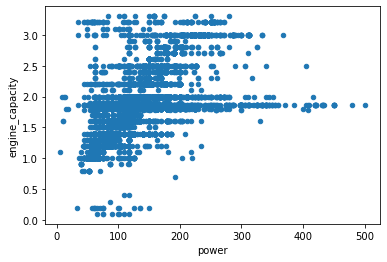

In [15]:
Xy.plot.scatter(x='power', y='engine_capacity')

In [16]:
Y_pred = reg.predict(X.values.reshape(-1, 1))

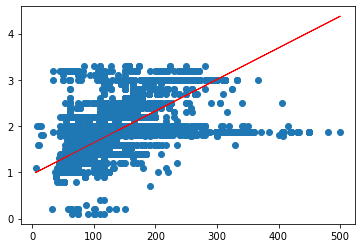

In [17]:
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red', linewidth=1)